In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

df=pd.read_csv('Data/fd-export.csv')
df = df.dropna()
df['checkin_date'] = pd.to_datetime(df['checkin_date'])
df.info()

C:\Users\bchou\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 869894 entries, 1 to 1048574
Data columns (total 9 columns):
user_id            869894 non-null object
age                869894 non-null float64
sex                869894 non-null object
country            869894 non-null object
checkin_date       869894 non-null datetime64[ns]
trackable_id       869894 non-null object
trackable_type     869894 non-null object
trackable_name     869894 non-null object
trackable_value    869894 non-null object
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 66.4+ MB


In [2]:
len(df)

869894

### Data Cleaning
- lowercase everything (e.g. diseases)
- treatments: vitamin d and vitamin d3 are the same
- misspellings
- how do account for random spaces in the beginning and end

In [3]:
df["trackable_name"] = df["trackable_name"].str.lower()

### Let's get a sense of what diseases are represented

In [4]:
df_conditions = df[df['trackable_type'] == 'Condition']
print(df_conditions['trackable_name'].value_counts().head(10))

fibromyalgia                9976
depression                  9292
anxiety                     8081
chronic fatigue syndrome    4810
migraine                    4604
ehlers-danlos syndrome      3055
asthma                      2714
ibs                         2599
headaches                   2118
endometriosis               2033
Name: trackable_name, dtype: int64


### For the top 5 diseases, how often is a treatment used?

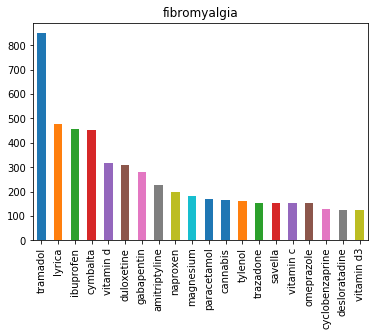

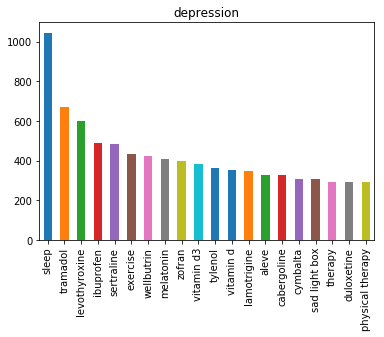

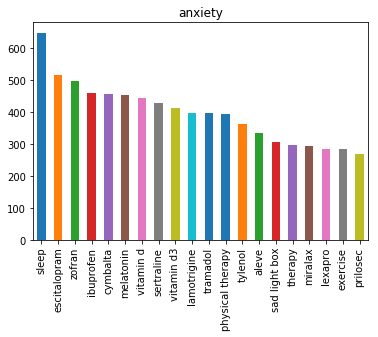

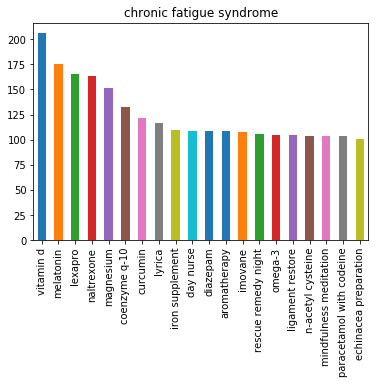

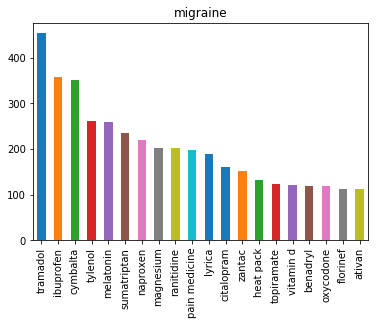

In [5]:
# the top_5_diseases list doesn't include more rigorous regex matching we do later down in the notebook
top_5_diseases = list(df[df['trackable_type'] == 'Condition']['trackable_name'].value_counts().head(5).index)
for i in top_5_diseases:
    distinct_user_check_in = df.groupby(['user_id', 'checkin_date']).filter(lambda x: i in x['trackable_name'].values)
    treatments = distinct_user_check_in[distinct_user_check_in['trackable_type'] == 'Treatment']['trackable_name']
    treatments.value_counts().head(20).plot.bar(title=i)
    plt.show()

This basically shows us how often a treatment is being used for a disease in the entire dataset. However, we count one usage as one user using it a least once on a unique day. This doesn't necessarily measure effectiveness of the treatment, which we will do later in the notebook

### Let's see if there are any trends with patients using Flaredown long term

In [6]:
def duration(x):
    return x.values[len(x)-1] - x.values[0]

# For each user, let's take create a new value called duration -> length of app usage
df_duration = df[df['trackable_type'] == 'Condition']
df_duration['duration'] = df.groupby('user_id')['checkin_date'].transform(duration)
df_duration['duration'] = pd.to_numeric(df_duration['duration'])
df_duration = df_duration.convert_objects(convert_numeric=True)
df_duration = df_duration.sort_values('duration',ascending=False)

# Let's just keep values that are at least 1 year (converted to nanoseconds, default for datetime series)
df_one_year = df_duration[df_duration['duration'] > 31556952000000000]

C:\Users\bchou\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bchou\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bchou\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  

C:\Users\bchou\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

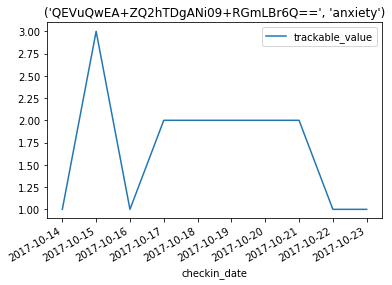

<Figure size 432x288 with 0 Axes>

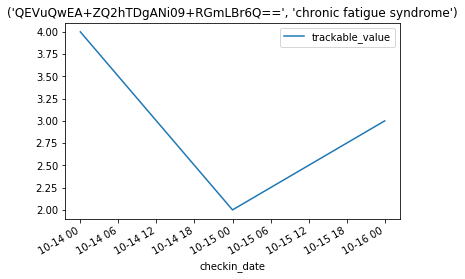

<Figure size 432x288 with 0 Axes>

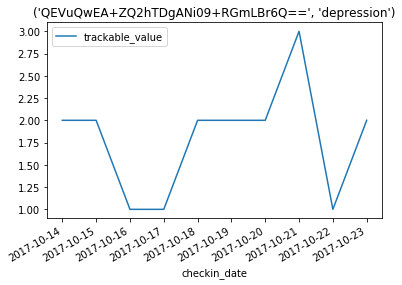

<Figure size 432x288 with 0 Axes>

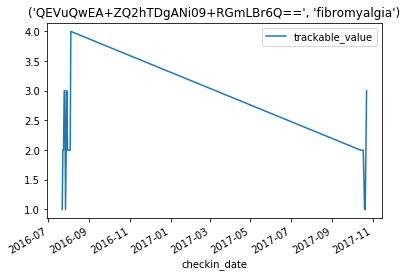

<Figure size 432x288 with 0 Axes>

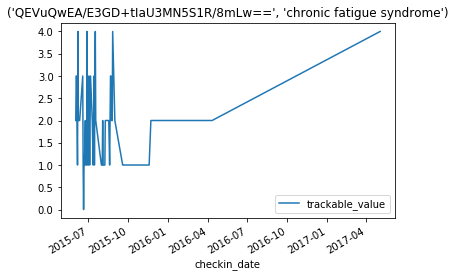

<Figure size 432x288 with 0 Axes>

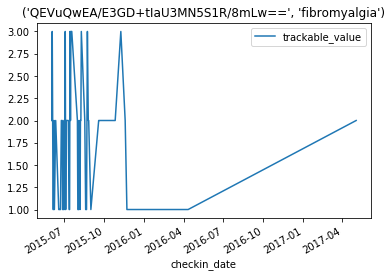

<Figure size 432x288 with 0 Axes>

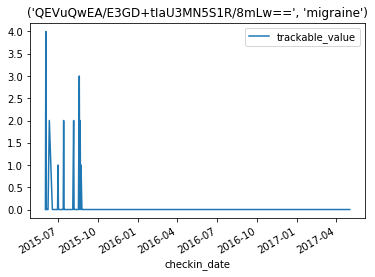

<Figure size 432x288 with 0 Axes>

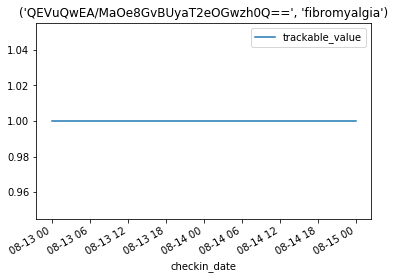

<Figure size 432x288 with 0 Axes>

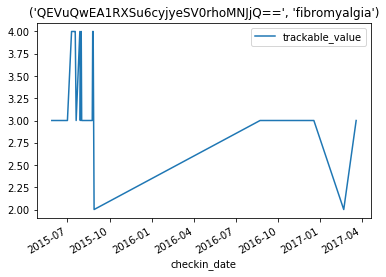

<Figure size 432x288 with 0 Axes>

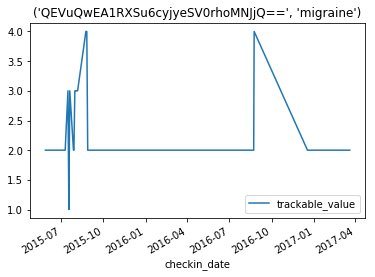

<Figure size 432x288 with 0 Axes>

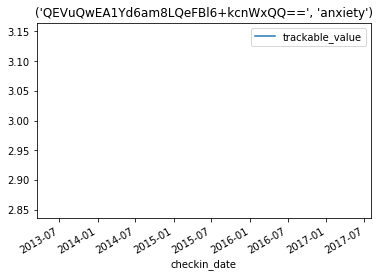

<Figure size 432x288 with 0 Axes>

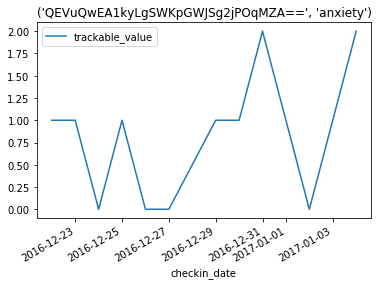

<Figure size 432x288 with 0 Axes>

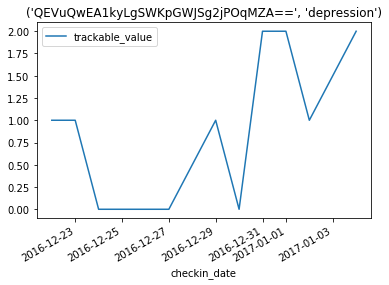

<Figure size 432x288 with 0 Axes>

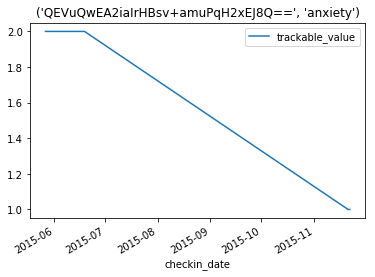

<Figure size 432x288 with 0 Axes>

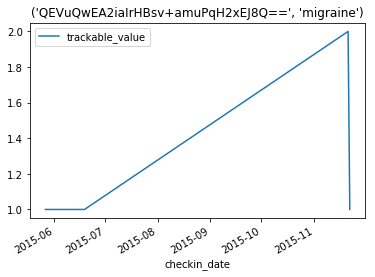

<Figure size 432x288 with 0 Axes>

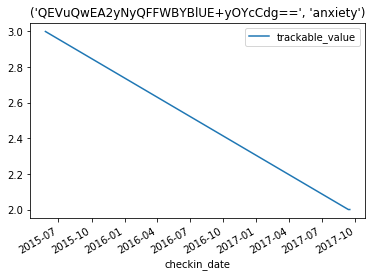

<Figure size 432x288 with 0 Axes>

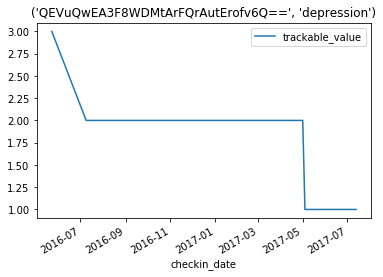

<Figure size 432x288 with 0 Axes>

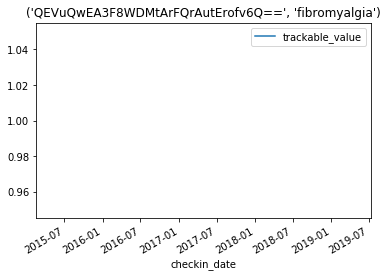

<Figure size 432x288 with 0 Axes>

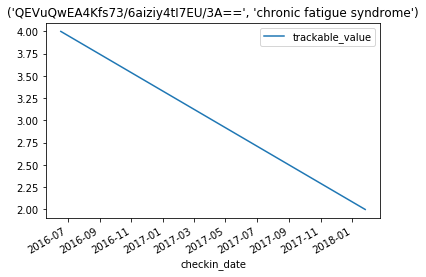

<Figure size 432x288 with 0 Axes>

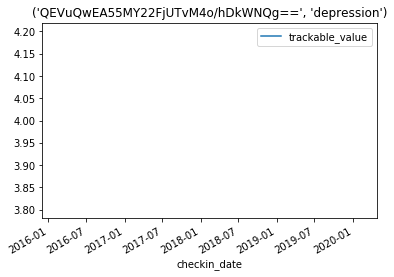

<Figure size 432x288 with 0 Axes>

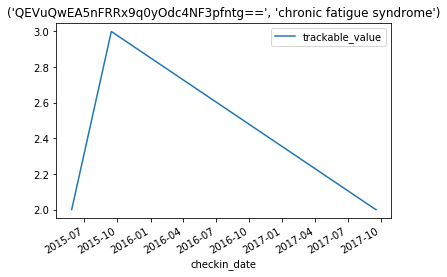

<Figure size 432x288 with 0 Axes>

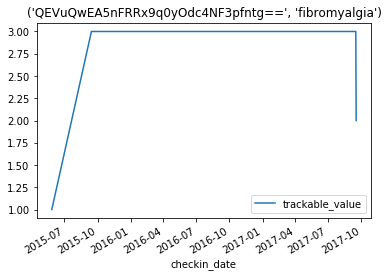

<Figure size 432x288 with 0 Axes>

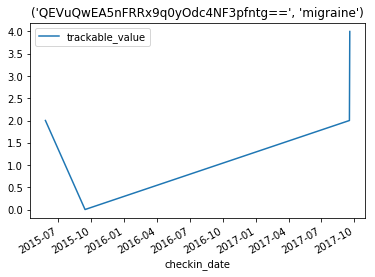

<Figure size 432x288 with 0 Axes>

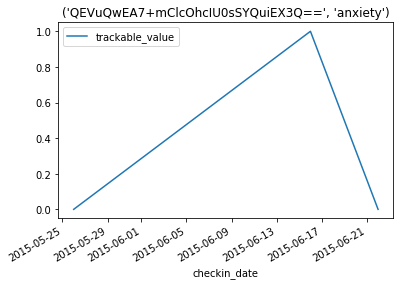

<Figure size 432x288 with 0 Axes>

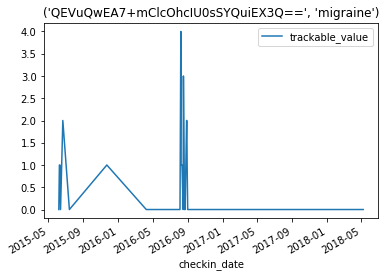

<Figure size 432x288 with 0 Axes>

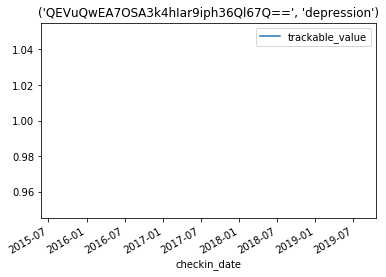

<Figure size 432x288 with 0 Axes>

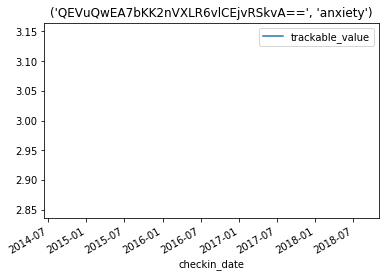

<Figure size 432x288 with 0 Axes>

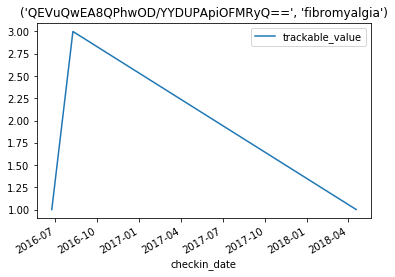

<Figure size 432x288 with 0 Axes>

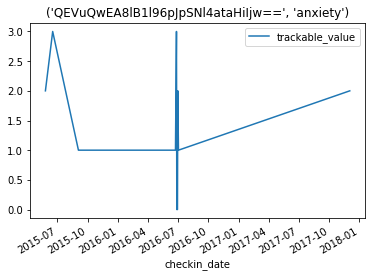

<Figure size 432x288 with 0 Axes>

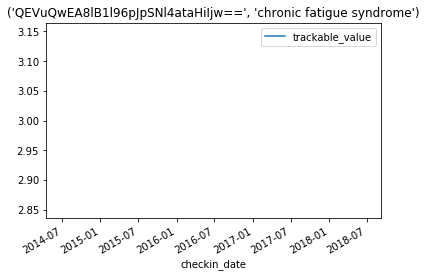

<Figure size 432x288 with 0 Axes>

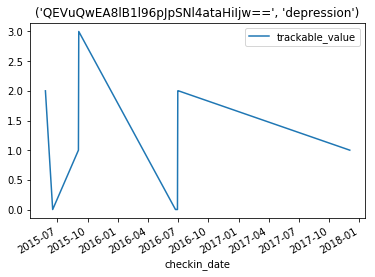

<Figure size 432x288 with 0 Axes>

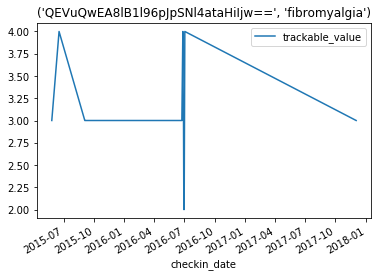

<Figure size 432x288 with 0 Axes>

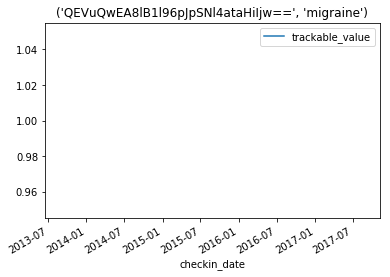

<Figure size 432x288 with 0 Axes>

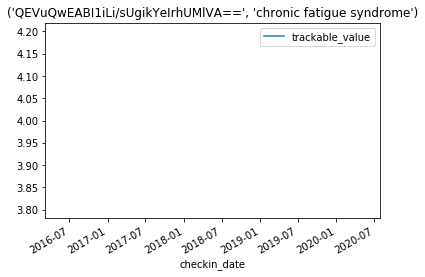

<Figure size 432x288 with 0 Axes>

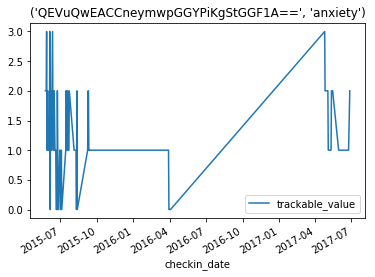

<Figure size 432x288 with 0 Axes>

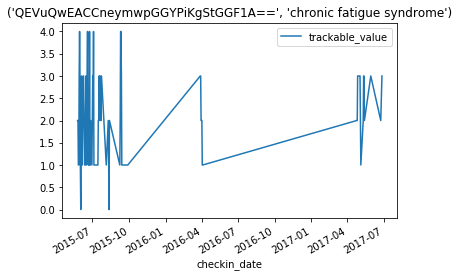

<Figure size 432x288 with 0 Axes>

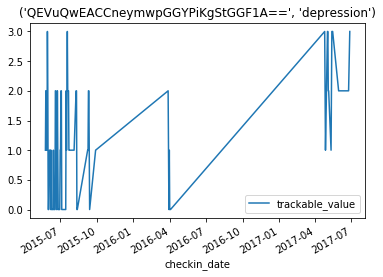

<Figure size 432x288 with 0 Axes>

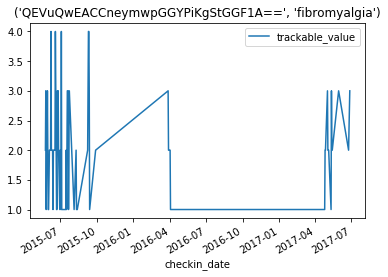

<Figure size 432x288 with 0 Axes>

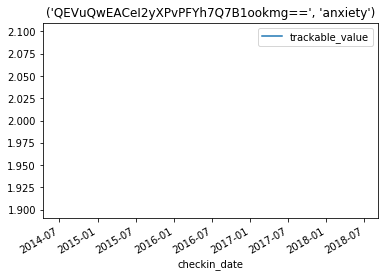

<Figure size 432x288 with 0 Axes>

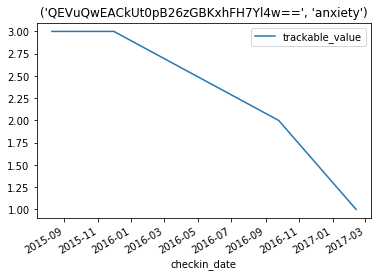

<Figure size 432x288 with 0 Axes>

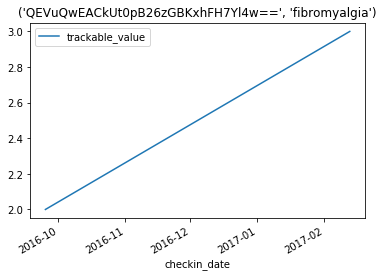

<Figure size 432x288 with 0 Axes>

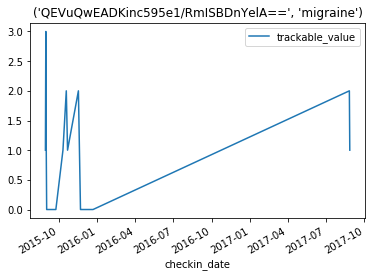

<Figure size 432x288 with 0 Axes>

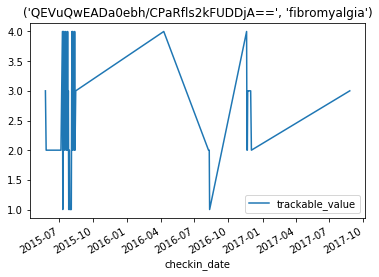

<Figure size 432x288 with 0 Axes>

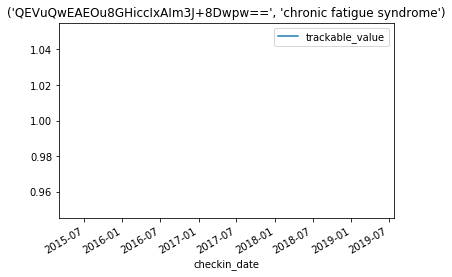

<Figure size 432x288 with 0 Axes>

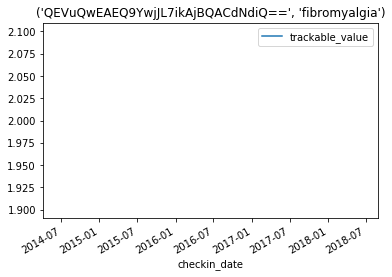

<Figure size 432x288 with 0 Axes>

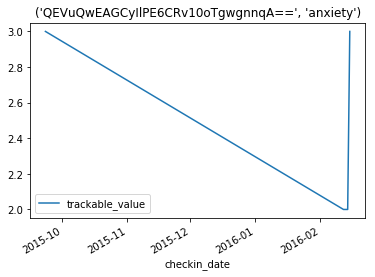

<Figure size 432x288 with 0 Axes>

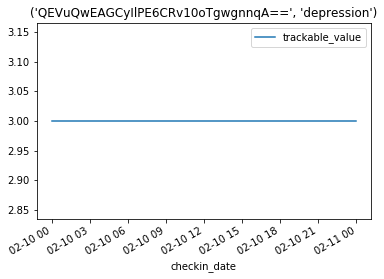

<Figure size 432x288 with 0 Axes>

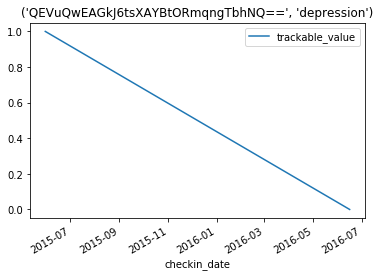

<Figure size 432x288 with 0 Axes>

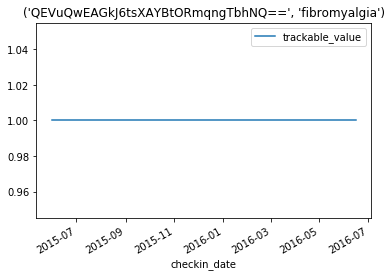

<Figure size 432x288 with 0 Axes>

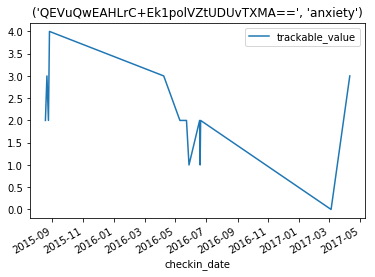

<Figure size 432x288 with 0 Axes>

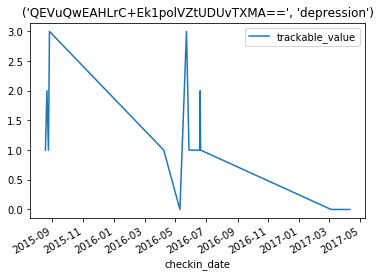

<Figure size 432x288 with 0 Axes>

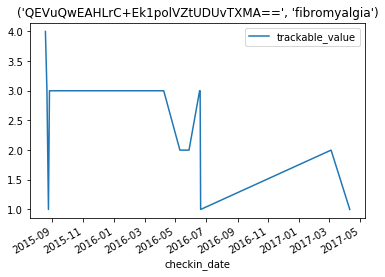

<Figure size 432x288 with 0 Axes>

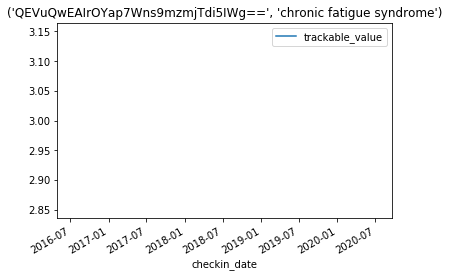

<Figure size 432x288 with 0 Axes>

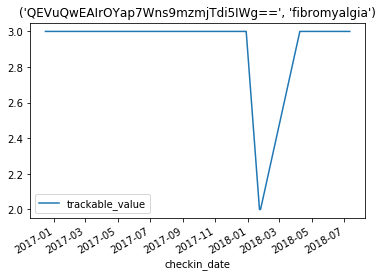

<Figure size 432x288 with 0 Axes>

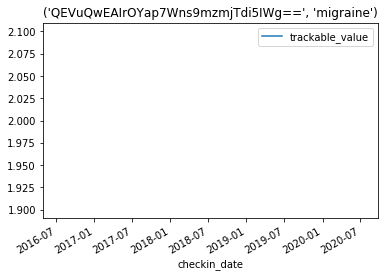

<Figure size 432x288 with 0 Axes>

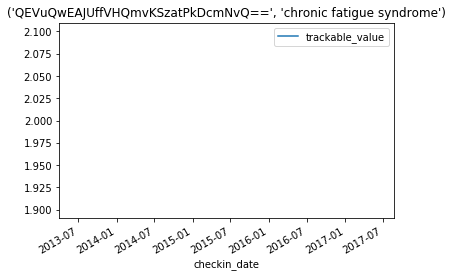

<Figure size 432x288 with 0 Axes>

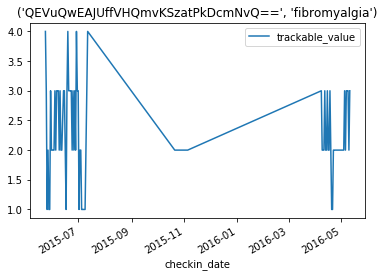

<Figure size 432x288 with 0 Axes>

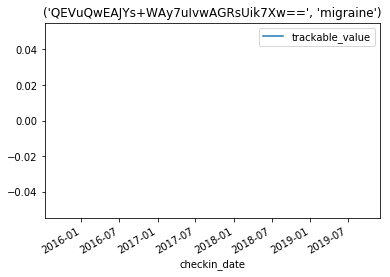

<Figure size 432x288 with 0 Axes>

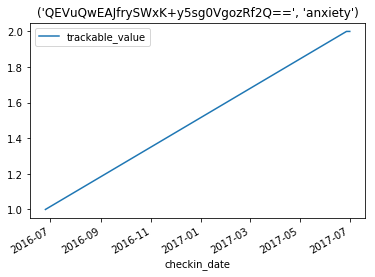

<Figure size 432x288 with 0 Axes>

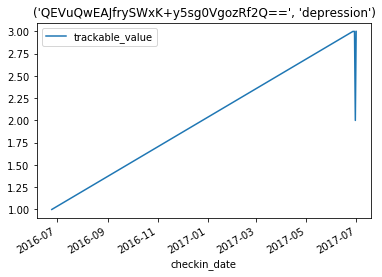

<Figure size 432x288 with 0 Axes>

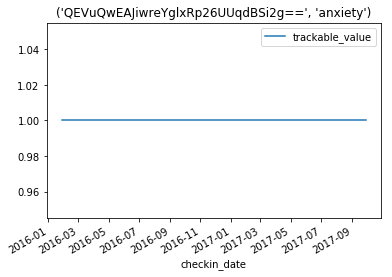

<Figure size 432x288 with 0 Axes>

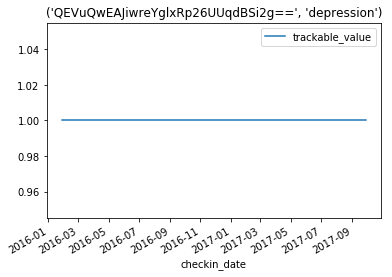

<Figure size 432x288 with 0 Axes>

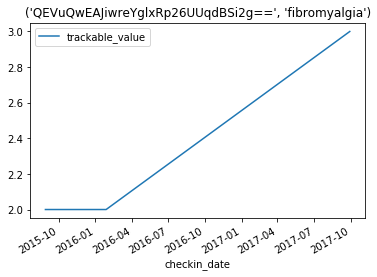

<Figure size 432x288 with 0 Axes>

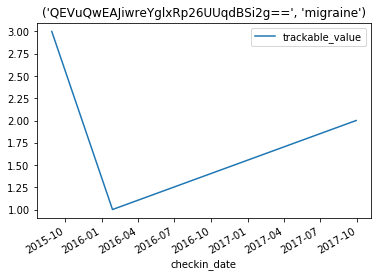

<Figure size 432x288 with 0 Axes>

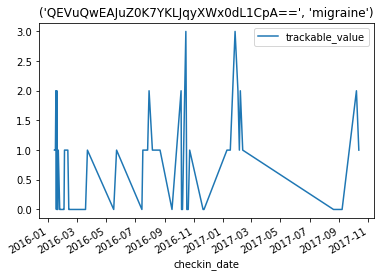

<Figure size 432x288 with 0 Axes>

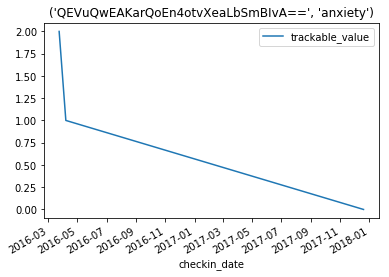

<Figure size 432x288 with 0 Axes>

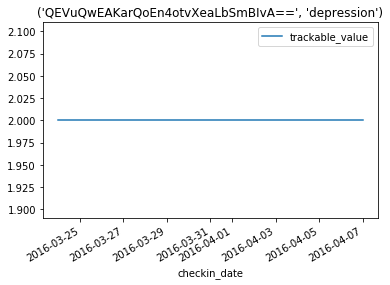

<Figure size 432x288 with 0 Axes>

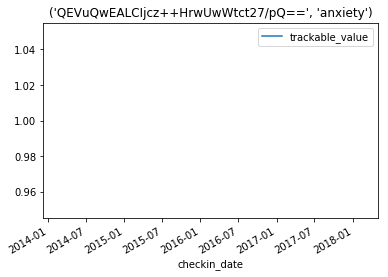

<Figure size 432x288 with 0 Axes>

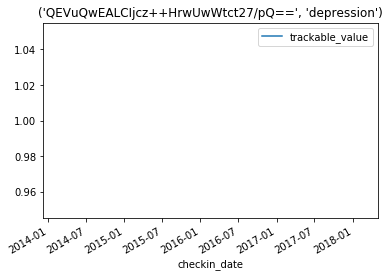

<Figure size 432x288 with 0 Axes>

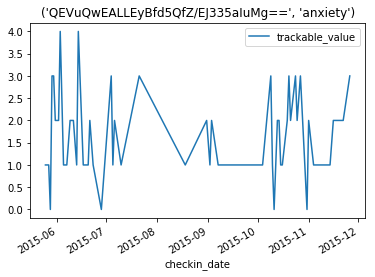

<Figure size 432x288 with 0 Axes>

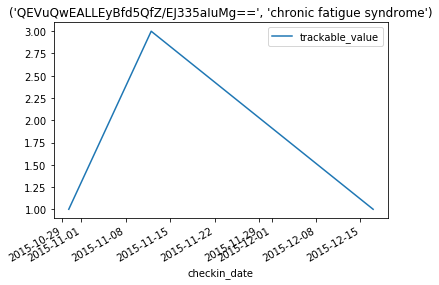

<Figure size 432x288 with 0 Axes>

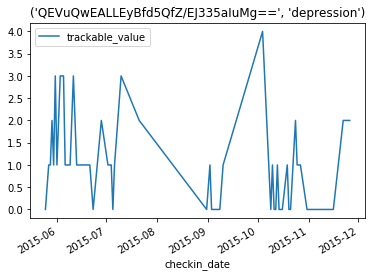

<Figure size 432x288 with 0 Axes>

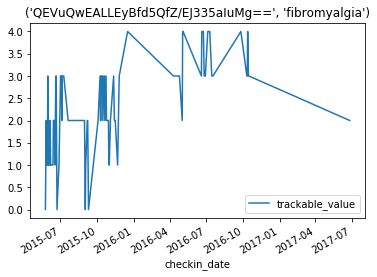

<Figure size 432x288 with 0 Axes>

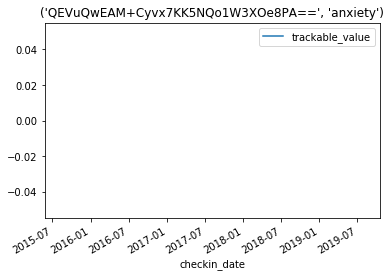

<Figure size 432x288 with 0 Axes>

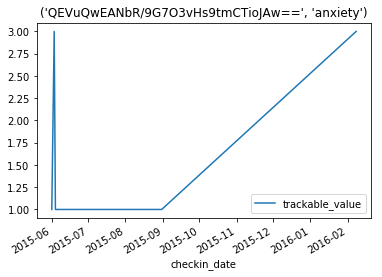

<Figure size 432x288 with 0 Axes>

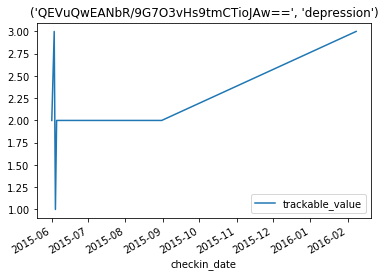

<Figure size 432x288 with 0 Axes>

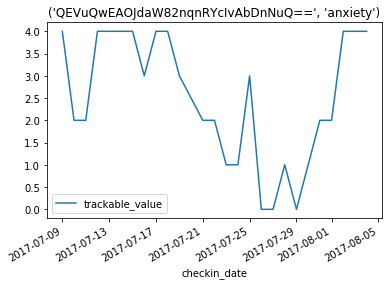

<Figure size 432x288 with 0 Axes>

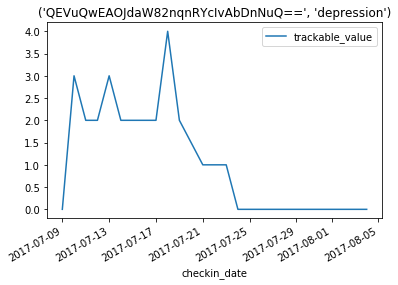

<Figure size 432x288 with 0 Axes>

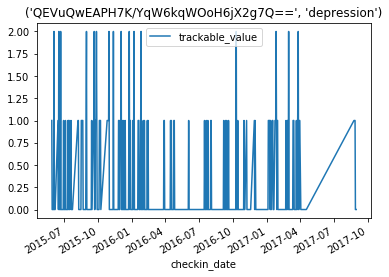

<Figure size 432x288 with 0 Axes>

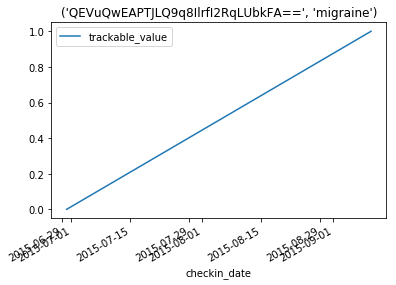

<Figure size 432x288 with 0 Axes>

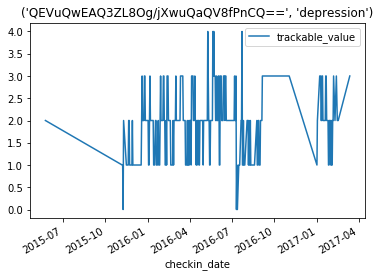

<Figure size 432x288 with 0 Axes>

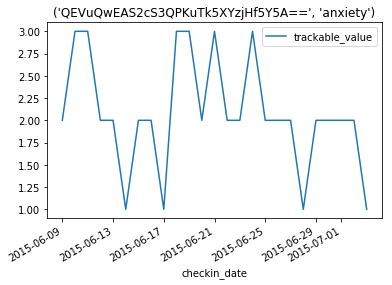

<Figure size 432x288 with 0 Axes>

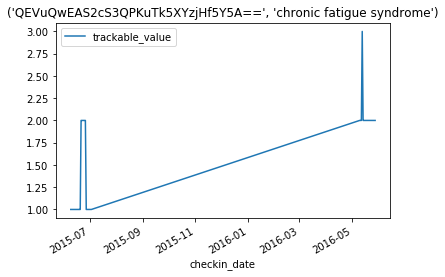

<Figure size 432x288 with 0 Axes>

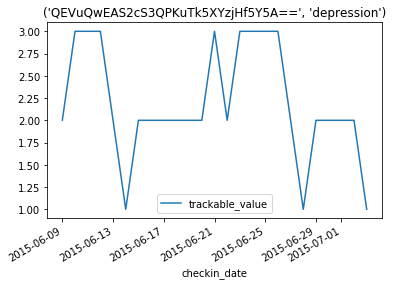

<Figure size 432x288 with 0 Axes>

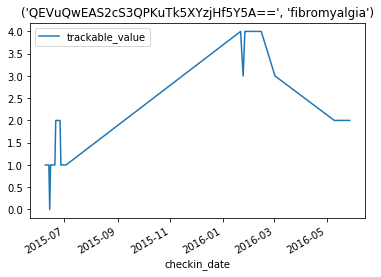

<Figure size 432x288 with 0 Axes>

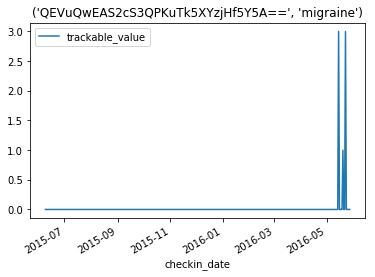

<Figure size 432x288 with 0 Axes>

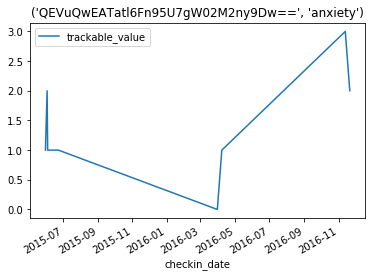

<Figure size 432x288 with 0 Axes>

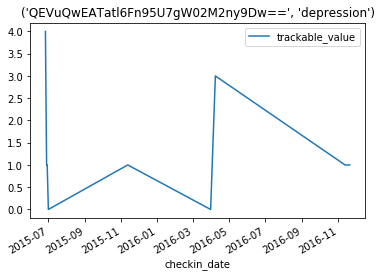

<Figure size 432x288 with 0 Axes>

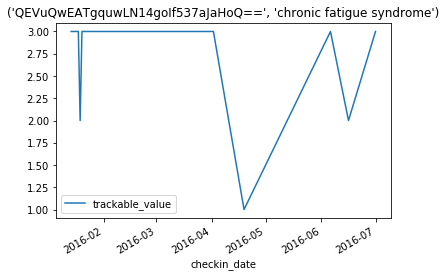

<Figure size 432x288 with 0 Axes>

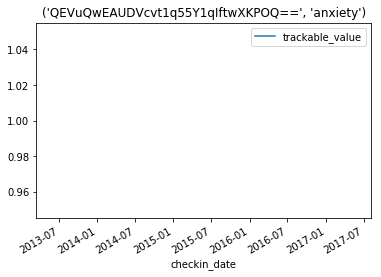

<Figure size 432x288 with 0 Axes>

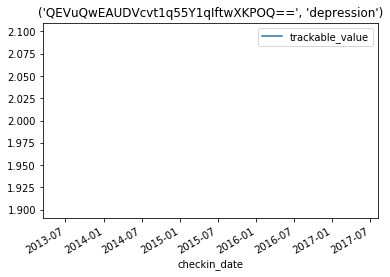

<Figure size 432x288 with 0 Axes>

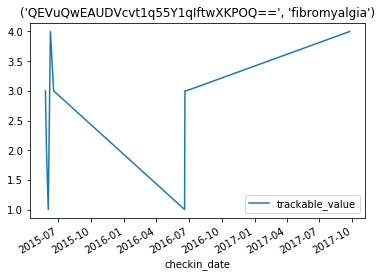

<Figure size 432x288 with 0 Axes>

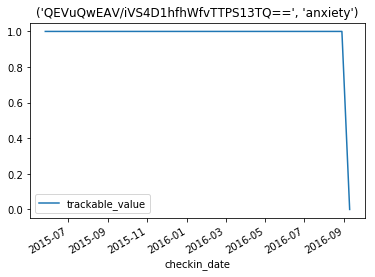

<Figure size 432x288 with 0 Axes>

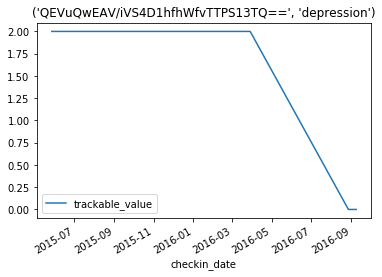

<Figure size 432x288 with 0 Axes>

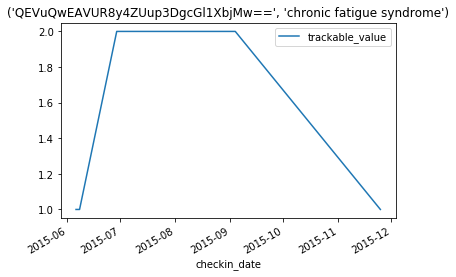

<Figure size 432x288 with 0 Axes>

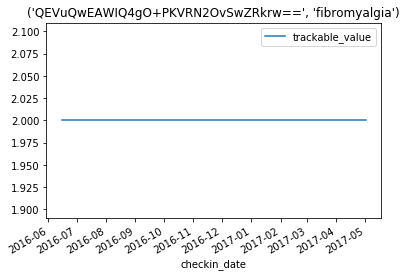

<Figure size 432x288 with 0 Axes>

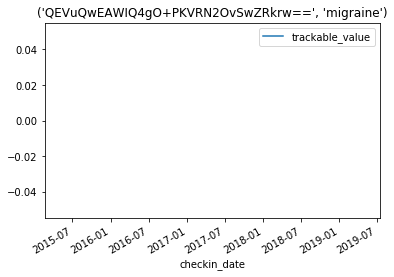

<Figure size 432x288 with 0 Axes>

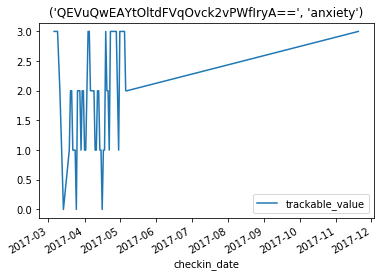

<Figure size 432x288 with 0 Axes>

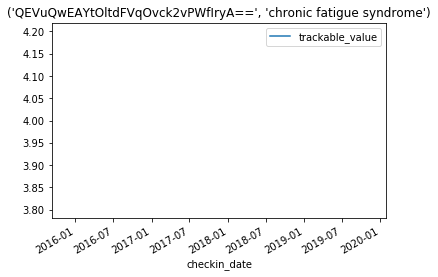

<Figure size 432x288 with 0 Axes>

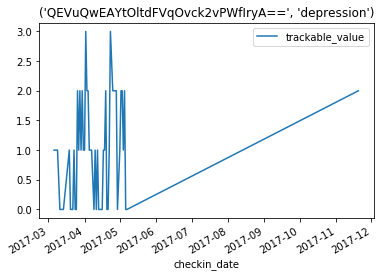

<Figure size 432x288 with 0 Axes>

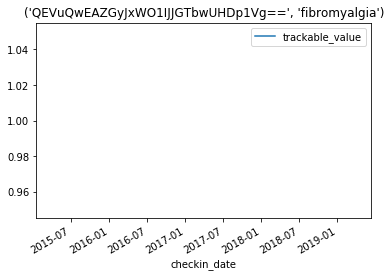

<Figure size 432x288 with 0 Axes>

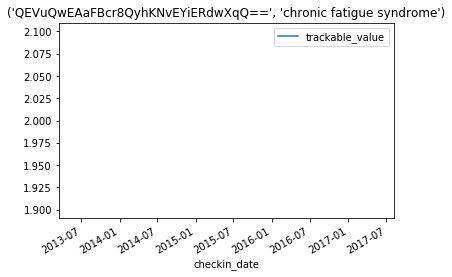

<Figure size 432x288 with 0 Axes>

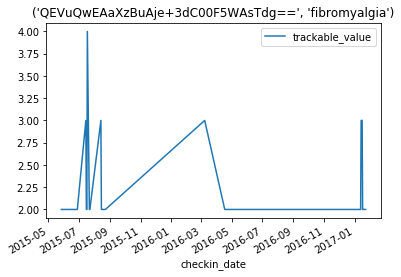

<Figure size 432x288 with 0 Axes>

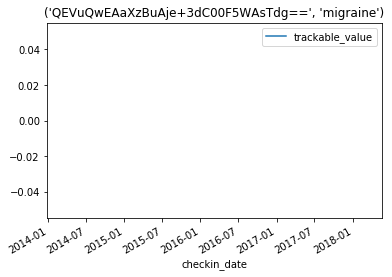

<Figure size 432x288 with 0 Axes>

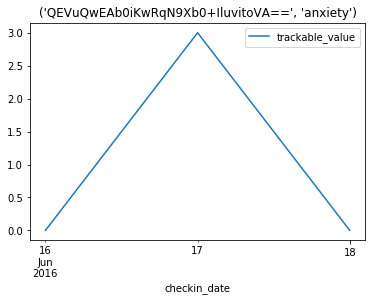

<Figure size 432x288 with 0 Axes>

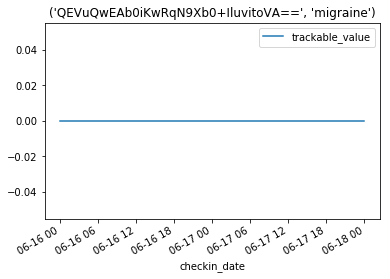

<Figure size 432x288 with 0 Axes>

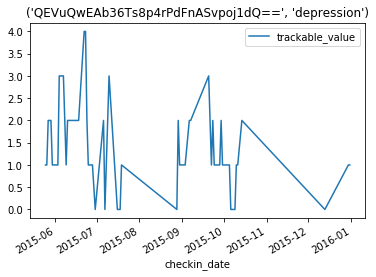

<Figure size 432x288 with 0 Axes>

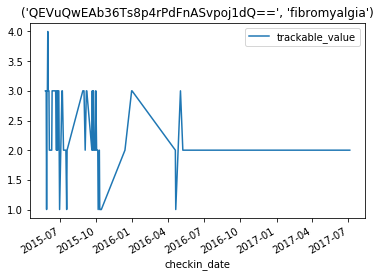

<Figure size 432x288 with 0 Axes>

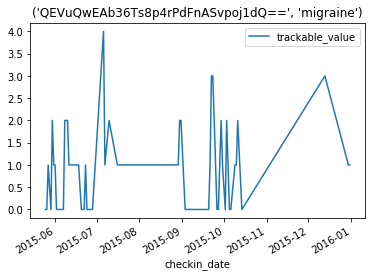

<Figure size 432x288 with 0 Axes>

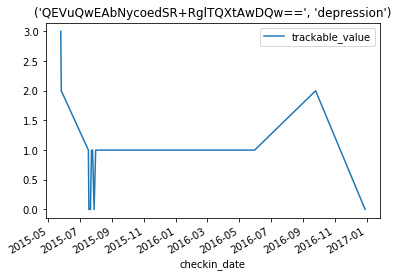

<Figure size 432x288 with 0 Axes>

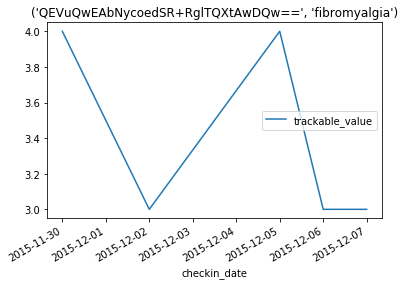

<Figure size 432x288 with 0 Axes>

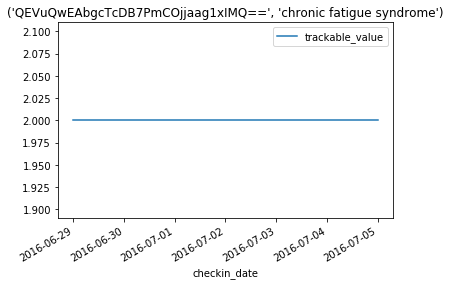

<Figure size 432x288 with 0 Axes>

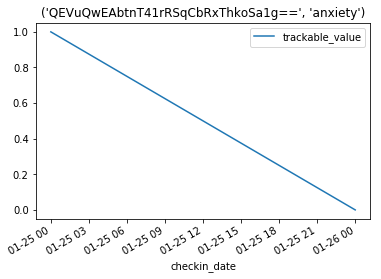

<Figure size 432x288 with 0 Axes>

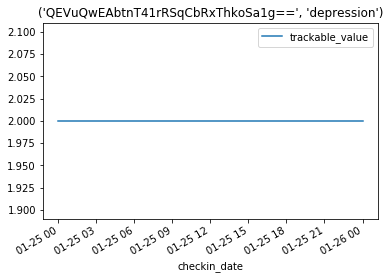

<Figure size 432x288 with 0 Axes>

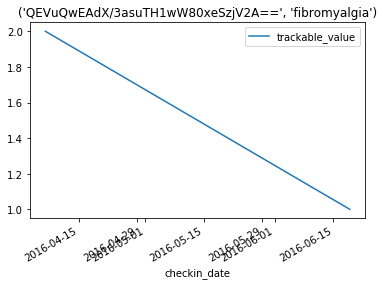

<Figure size 432x288 with 0 Axes>

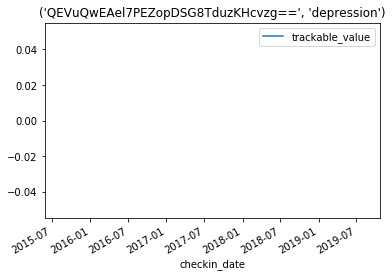

<Figure size 432x288 with 0 Axes>

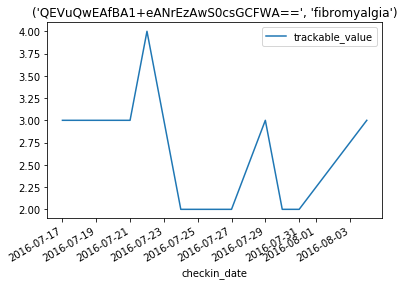

<Figure size 432x288 with 0 Axes>

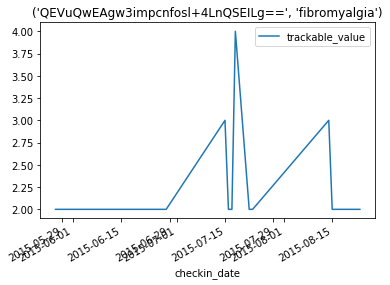

<Figure size 432x288 with 0 Axes>

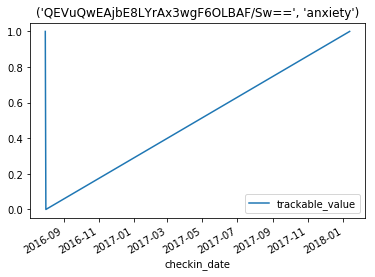

<Figure size 432x288 with 0 Axes>

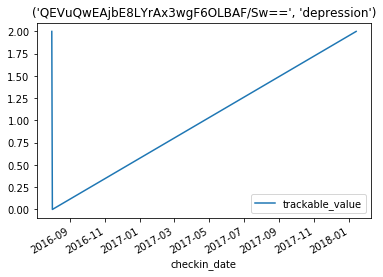

<Figure size 432x288 with 0 Axes>

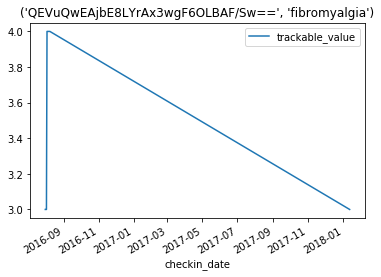

<Figure size 432x288 with 0 Axes>

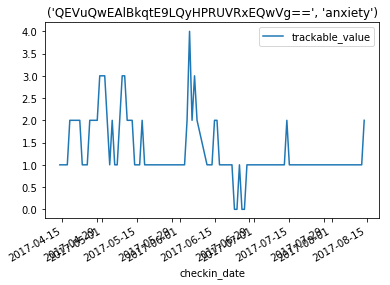

<Figure size 432x288 with 0 Axes>

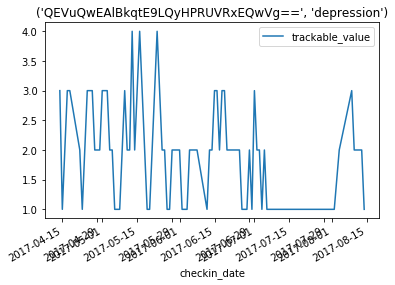

<Figure size 432x288 with 0 Axes>

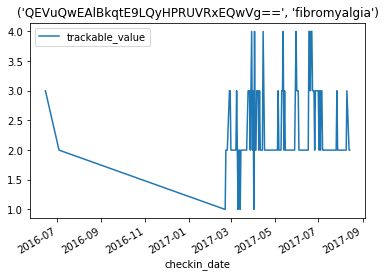

<Figure size 432x288 with 0 Axes>

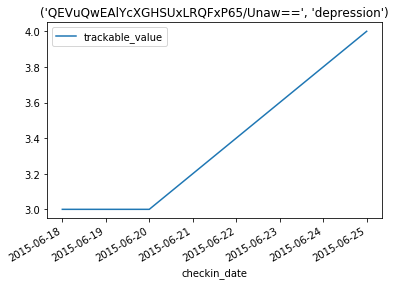

<Figure size 432x288 with 0 Axes>

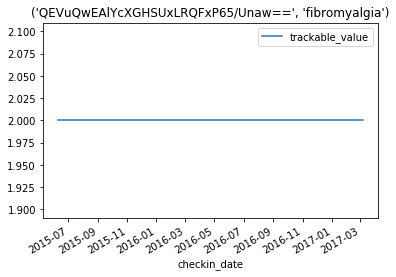

<Figure size 432x288 with 0 Axes>

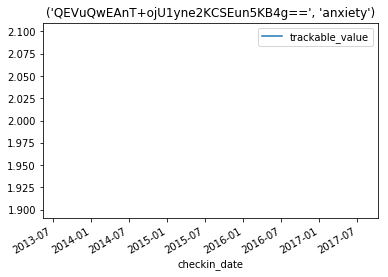

<Figure size 432x288 with 0 Axes>

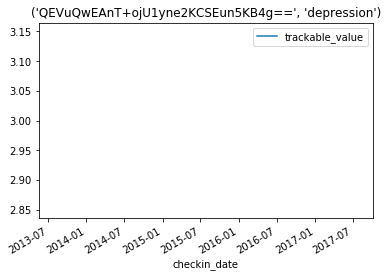

<Figure size 432x288 with 0 Axes>

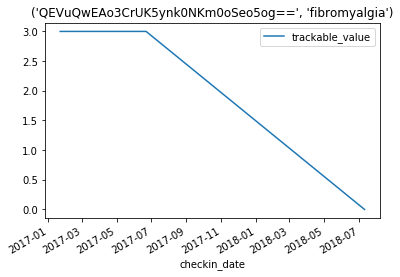

<Figure size 432x288 with 0 Axes>

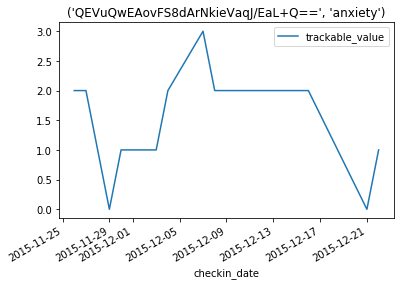

<Figure size 432x288 with 0 Axes>

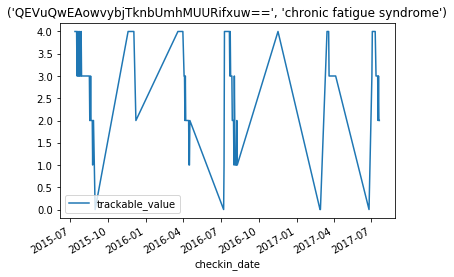

<Figure size 432x288 with 0 Axes>

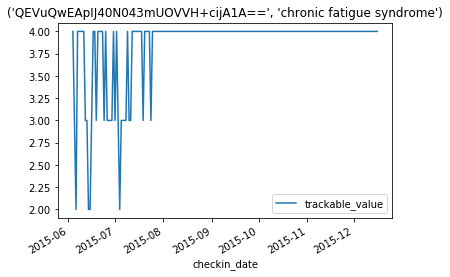

<Figure size 432x288 with 0 Axes>

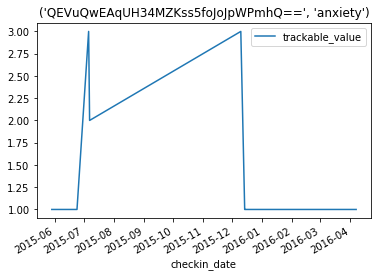

<Figure size 432x288 with 0 Axes>

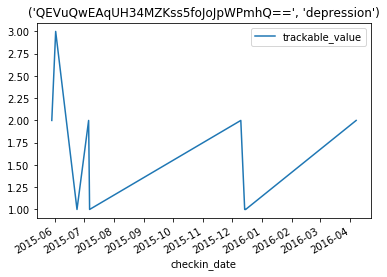

<Figure size 432x288 with 0 Axes>

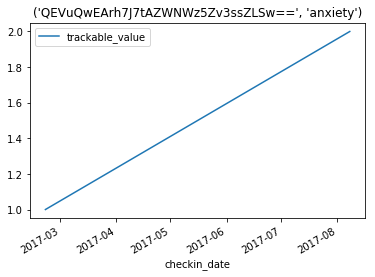

<Figure size 432x288 with 0 Axes>

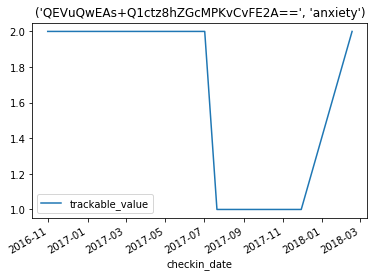

<Figure size 432x288 with 0 Axes>

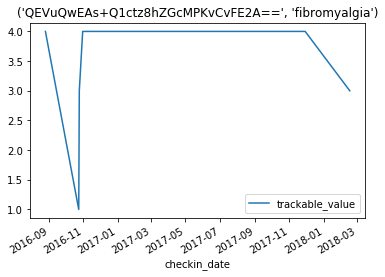

<Figure size 432x288 with 0 Axes>

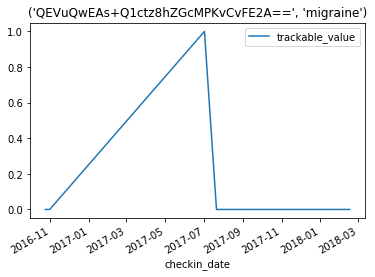

<Figure size 432x288 with 0 Axes>

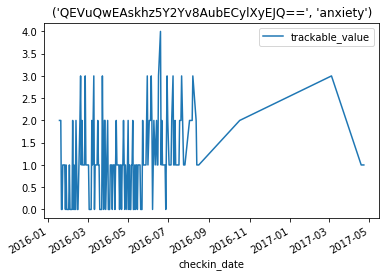

<Figure size 432x288 with 0 Axes>

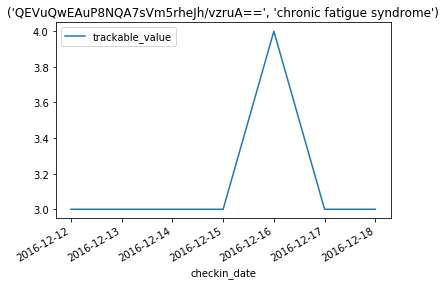

<Figure size 432x288 with 0 Axes>

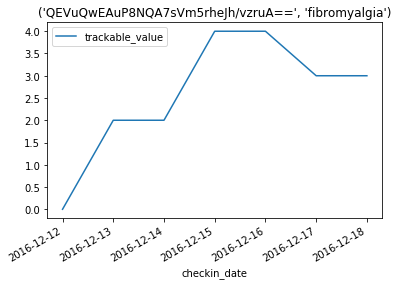

<Figure size 432x288 with 0 Axes>

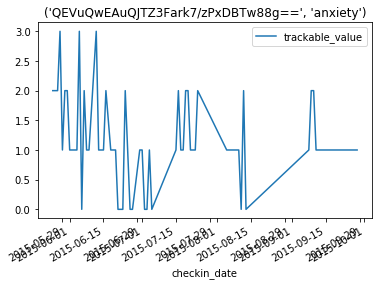

<Figure size 432x288 with 0 Axes>

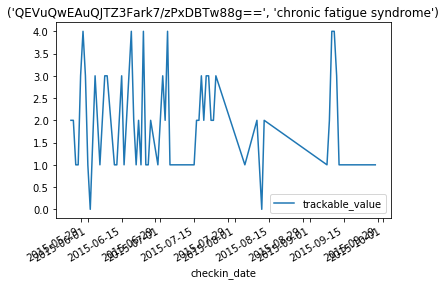

<Figure size 432x288 with 0 Axes>

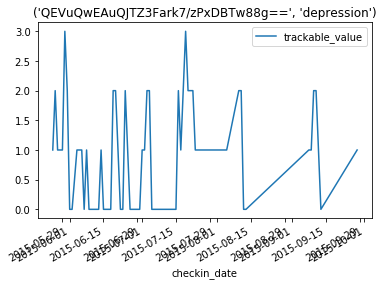

<Figure size 432x288 with 0 Axes>

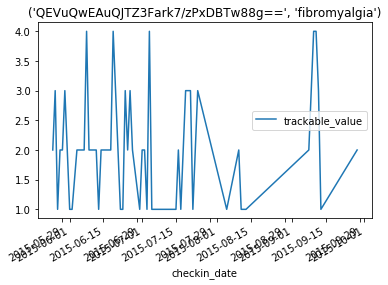

<Figure size 432x288 with 0 Axes>

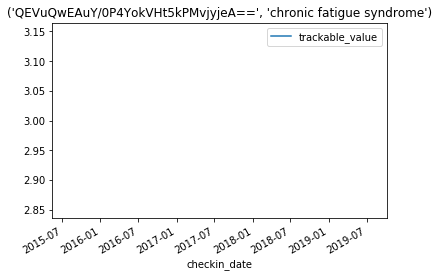

<Figure size 432x288 with 0 Axes>

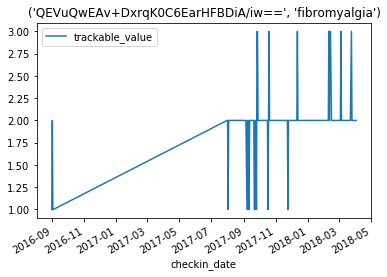

<Figure size 432x288 with 0 Axes>

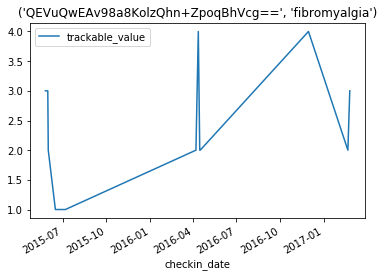

<Figure size 432x288 with 0 Axes>

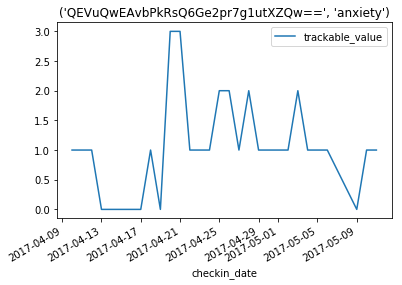

<Figure size 432x288 with 0 Axes>

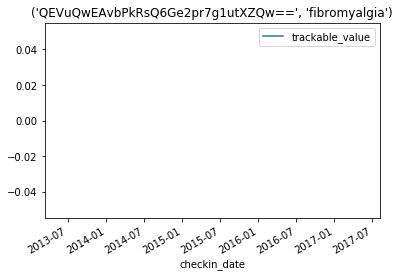

<Figure size 432x288 with 0 Axes>

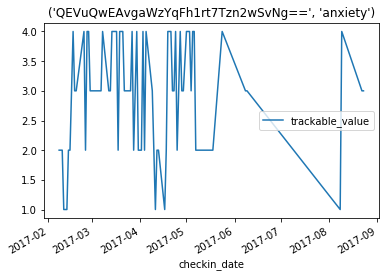

<Figure size 432x288 with 0 Axes>

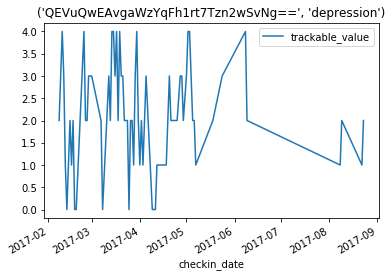

<Figure size 432x288 with 0 Axes>

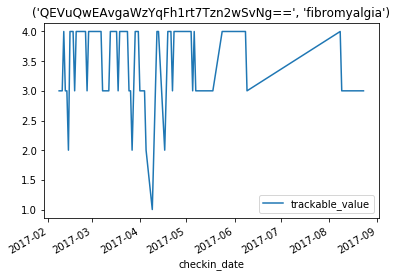

<Figure size 432x288 with 0 Axes>

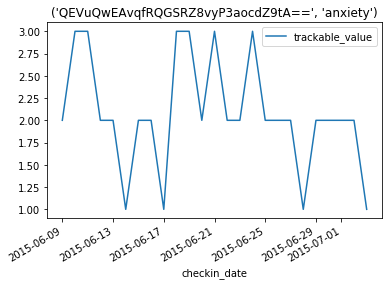

<Figure size 432x288 with 0 Axes>

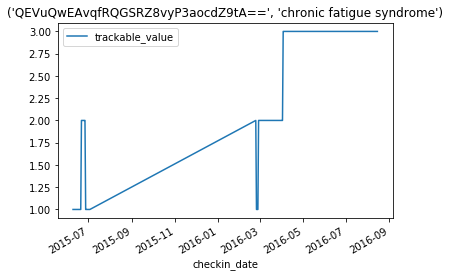

<Figure size 432x288 with 0 Axes>

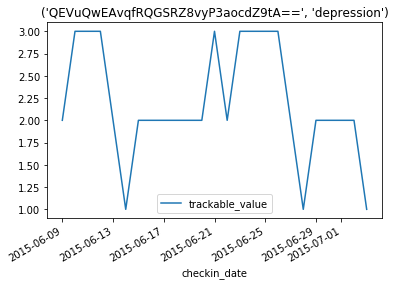

<Figure size 432x288 with 0 Axes>

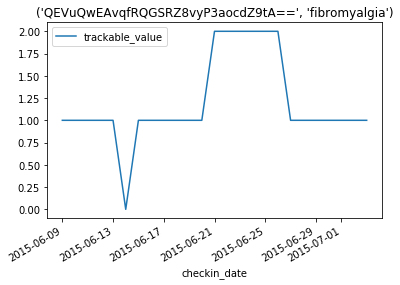

<Figure size 432x288 with 0 Axes>

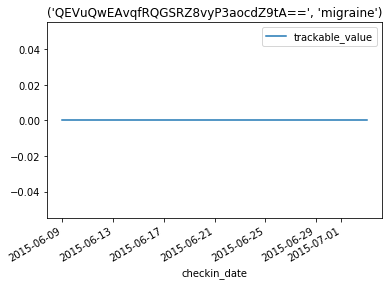

<Figure size 432x288 with 0 Axes>

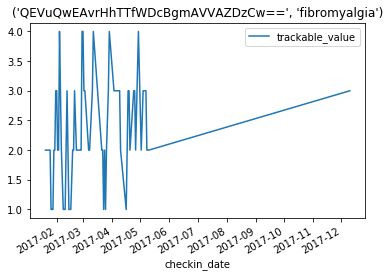

<Figure size 432x288 with 0 Axes>

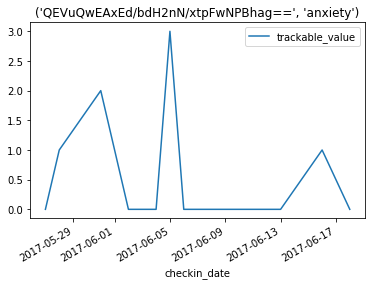

<Figure size 432x288 with 0 Axes>

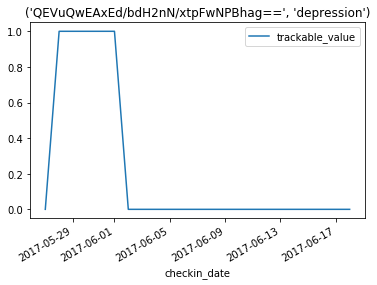

<Figure size 432x288 with 0 Axes>

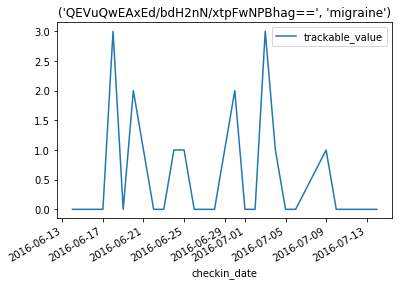

<Figure size 432x288 with 0 Axes>

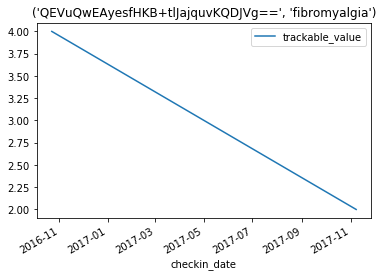

<Figure size 432x288 with 0 Axes>

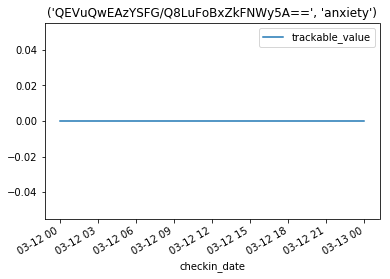

<Figure size 432x288 with 0 Axes>

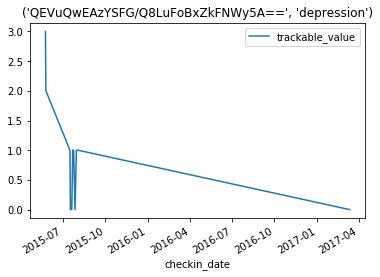

<Figure size 432x288 with 0 Axes>

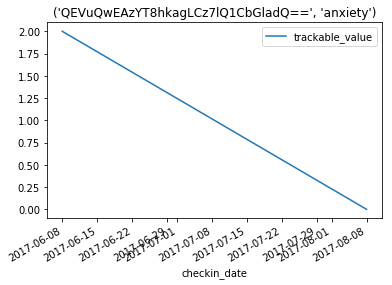

<Figure size 432x288 with 0 Axes>

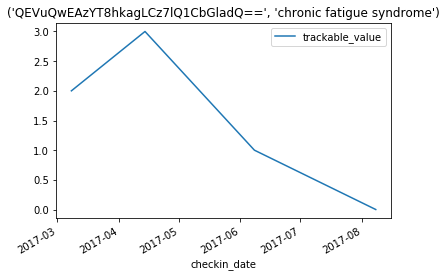

In [7]:
# keep scale to 4, whole scale

for i, group in df_one_year.groupby(['user_id','trackable_name']):
    if i[1] in top_5_diseases:
        plt.figure()
        group.plot(x='checkin_date', y='trackable_value', title=str(i))

### Let's look at specific autoimmune diseases

In [8]:
dfMS=df[df["trackable_name"].str.contains('^ms$|multiple sclerosis',regex=True)]
print("Users experiencing MS: "+ str(len(dfMS.groupby('user_id'))))
# ^ not necessarily the number of data points, but rather the number of unique users experiencing this disease
# if we want to look at datapoints, just print without user id
print("# of datapoints for MS: "+ str(len(dfMS)))
print(set(dfMS["trackable_name"]))

Users experiencing MS: 157
# of datapoints for MS: 542
{'ms', 'multiple sclerosis'}


In [9]:
dfRA=df[df["trackable_name"].str.contains('^ra$|rheumatoid arthritis', regex=True)]
print("Users experiencing RA: "+ str(len(dfRA.groupby('user_id'))))
print("# of datapoints for RA: "+ str(len(dfRA)))
print(set(dfRA["trackable_name"]))

Users experiencing RA: 353
# of datapoints for RA: 1331
{'juvenile rheumatoid arthritis', 'rheumatoid arthritis'}


In [10]:
dfPso=df[df["trackable_name"].str.contains('psoriasis', regex=True)]
print("Users experiencing Psoriasis: "+ str(len(dfPso.groupby('user_id'))))
print("# of datapoints for Psoriasis: "+ str(len(dfPso)))
print(set(dfPso["trackable_name"]))

Users experiencing Psoriasis: 157
# of datapoints for Psoriasis: 1116
{'rash psoriasis', 'psoriasis', 'guttate psoriasis'}


In [11]:
dfLup=df[df["trackable_name"].str.contains('lupus|^sle$', regex=True)]
print("Users experiencing Lupus: "+ str(len(dfLup.groupby('user_id'))))
print("# of datapoints for Lupus: "+ str(len(dfLup)))
print(set(dfLup["trackable_name"]))

Users experiencing Lupus: 437
# of datapoints for Lupus: 1517
{'lupus rash', 'sytemic lupus erythematosus', 'sle', 'discoid lupus', 'lupus butterfly rash', 'systematic lupus', 'lupus nephritis', 'systemic lupus erythematosus', 'lupus fog', 'sub acute cutaneous lupus erythmatosis', 'lupus'}


In [12]:
# added a space after crest so we wouldn't get matches like crestor, which is totally different
dfScle=df[df["trackable_name"].str.contains('scleroderma|crest ', regex=True)]
print("Users experiencing Scleroderma: "+ str(len(dfScle.groupby('user_id'))))
print("# of datapoints for Scleroderma: "+ str(len(dfScle)))
print(set(dfScle["trackable_name"]))

Users experiencing Scleroderma: 21
# of datapoints for Scleroderma: 310
{'crest syndrome', 'scleroderma', 'systemic scleroderma', 'limited scleroderma (crest syndrome)'}


In [13]:
dfCrohn=df[df["trackable_name"].str.contains('crohn|ileitis', regex=True)]
print("Users experiencing Crohn's disease: "+ str(len(dfCrohn.groupby('user_id'))))
print("# of datapoints for Crohn's disease: "+ str(len(dfCrohn)))
print(set(dfCrohn["trackable_name"]))
# figure out why Crohn is including rando values
# have to change df such that we check if a user has Crohn at any point in time, not just the one instance they record it

Users experiencing Crohn's disease: 399
# of datapoints for Crohn's disease: 1482
{'crohns', 'spondylitis , crohns disease,copd', "crohn's disease", 'crohn', 'crohns disease', 'crohn’s disease'}


### Now let's look at the effectiveness of treatments for these select diseases
we will look at the treatment_value before and after the day a treatment is used.  
to do: can we check the long term effectiveness of a treatment? aka correlation over time.
Reread pytho nnotebook on this, compile a list of questions such as this one to ask (active q doc)  
Aka what if the benefits occur later in the week? I don't want the averaging of the first negative points to affect the later positive poitns  

### Do pharmaceuticals fare better than home remedies?

In [ ]:
# using the top_5_df to make things faster

# measure treatment effectiveness per user before and after start date

# merge 2 dfs: one with treatments + start date and another with condition/symptoms per user